## Plot (a) catalyst amount, (b) catalyst purchase cost, (c) total refueling station cost vs. dehydrogenation temperature and pressure for multiple catalysts

### IMPORT MODULES

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# update plot formatting
mpl.rcParams.update({'font.size': 14})
mpl.rcParams.update({'mathtext.default': 'rm'})
mpl.rcParams.update({'font.family': 'sans-serif'})
mpl.rcParams.update({'font.sans-serif': 'Calibri'})

### USER INPUT

In [3]:
# output folder to use for plots
folder = 'outputs 2024-08-09 multi catal'

In [4]:
# user-defined input parameter names for plots
input_params_varied_user = [
    'scenario', 
    'dehydr. reaction temperature (K)', 
    'dehydr. reaction pressure (bar)',
    ]

### READ INPUT PARAMETERS

In [5]:
# read input parameter map
df_input_params = pd.read_csv(
    os.path.join('..\outputs', folder, 'input params.csv'),
    index_col = 'run #'
    )

# drop "default" results
df_input_params = df_input_params.loc[df_input_params.index != 0]

# extract output dollar year
output_dollar_year = df_input_params['output dollar year'].values[0]

In [6]:
# extract catalyst unit costs ($/kg)
df_catal_unit_cost = df_input_params[[
    'scenario', 
    'dehydr. catalyst cost ($/kg)'
]].drop_duplicates()

# rename scenario (catalyst name)
df_catal_unit_cost['scenario'] = \
    df_catal_unit_cost['scenario'].str.strip(' 4nm')

# set index
df_catal_unit_cost.set_index(
    'scenario',
    inplace=True
)

df_catal_unit_cost

,dehydr. catalyst cost ($/kg)
scenario,
Pd,3500.0
Pt,3000.0
Cu,1400.0


In [7]:
# read varied input parameters
df_input_params_varied_all = pd.read_csv(
    os.path.join('..\outputs', folder, 'input params_varied.csv'), 
    index_col = 'run #'
    )

In [8]:
# create dataframe of input parameters to plot
df_input_params_varied_plot = df_input_params_varied_all.copy()

# use user-defined input parameters for plots if not empty
if input_params_varied_user:
    df_input_params_varied_plot = \
        df_input_params_varied_all[input_params_varied_user]
    
df_input_params_varied_plot

,scenario,dehydr. reaction temperature (K),dehydr. reaction pressure (bar)
run #,,,
0,baseline,300.000000,1.0
1,Pd 4nm,300.000000,1.0
2,Pd 4nm,310.526316,1.0
3,Pd 4nm,321.052632,1.0
4,Pd 4nm,331.578947,1.0
5,Pd 4nm,342.105263,1.0
6,Pd 4nm,352.631579,1.0
7,Pd 4nm,363.157895,1.0
8,Pd 4nm,373.684211,1.0


### DATA PROCESSING: total refueling station cost

In [9]:
# read csv
f = 'output_all runs_refueling station costs.csv'
df_stn = pd.read_csv(
    os.path.join('..\outputs', folder, f), 
    index_col = 'run #'
    )

# merge in varied input parameters
df_stn = df_input_params_varied_plot.merge(
    right = df_stn, 
    on='run #', 
    how = 'right'
    )

# drop "default" results
df_stn = df_stn.loc[df_stn.index != 0]

df_stn

,scenario,dehydr. reaction temperature (K),dehydr. reaction pressure (bar),pathway,process,location,function,equipment,variable group,variable name,unit,value
run #,,,,,,,,,,,,
1,Pd 4nm,300.000000,1.0,all,all,all,all,all,input parameter,dehydr. reactor volume,m^3,7.310286e-02
1,Pd 4nm,300.000000,1.0,all,all,all,all,all,input parameter,dehydr. catalyst amount,kg,9.646712e+00
1,Pd 4nm,300.000000,1.0,LOHC - formic acid,reconditioning,refueling station,pumping,reactor pump,energy cost,electricity cost,$/yr,0.000000e+00
1,Pd 4nm,300.000000,1.0,LOHC - formic acid,reconditioning,refueling station,pumping,reactor pump,energy cost,electricity cost,$/kg H2,0.000000e+00
1,Pd 4nm,300.000000,1.0,LOHC - formic acid,reconditioning,refueling station,pumping,reactor pump,O&M cost,"operation, maintenance, repair costs",$/yr,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
54,Cu 4nm,384.210526,100.0,LOHC - formic acid,reconditioning,refueling station,cooling,refrigerator,capital cost,levelized capital cost,$/kg H2,8.786406e-02
54,Cu 4nm,384.210526,100.0,LOHC - formic acid,reconditioning,refueling station,storage,liquid storage,capital cost,levelized capital cost,$/yr,6.718135e+04
54,Cu 4nm,384.210526,100.0,LOHC - formic acid,reconditioning,refueling station,storage,liquid storage,capital cost,levelized capital cost,$/kg H2,1.840585e-02


In [10]:
# filter results by units
df_stn_usd_per_kg = df_stn.loc[df_stn['unit'] == '$/kg H2'].copy()

In [11]:
# calculate total refueling station costs 
# as a function of temperature and pressure
df_stn_tot = df_stn_usd_per_kg.groupby(
    by = df_input_params_varied_plot.columns.tolist()
    )['value'].sum().reset_index()

# rename columns
df_stn_tot.rename(
    columns = {
        'value' : '$/kg H2'
        }, 
    inplace = True
    )

# convert temperature to deg.C
df_stn_tot['dehydr. reaction temperature (C)'] = \
    df_stn_tot['dehydr. reaction temperature (K)'] - 273.15

df_stn_tot

,scenario,dehydr. reaction temperature (K),dehydr. reaction pressure (bar),$/kg H2,dehydr. reaction temperature (C)
0,Cu 4nm,300.000000,1.0,7.118231,26.850000
1,Cu 4nm,300.000000,100.0,4.364424,26.850000
2,Cu 4nm,310.526316,1.0,6.738462,37.376316
3,Cu 4nm,310.526316,100.0,4.333959,37.376316
4,Cu 4nm,321.052632,1.0,6.557565,47.902632
5,Cu 4nm,321.052632,100.0,4.326265,47.902632
6,Cu 4nm,331.578947,1.0,6.413009,58.428947
7,Cu 4nm,331.578947,100.0,4.323122,58.428947
8,Cu 4nm,342.105263,1.0,6.290325,68.955263
9,Cu 4nm,342.105263,100.0,4.325120,68.955263


In [12]:
# dehydr. pressures to plot
dehydr_pres_bar_to_plot = [
    df_stn_tot['dehydr. reaction pressure (bar)'].min(),
    df_stn_tot['dehydr. reaction pressure (bar)'].max(),
    ]

dehydr_pres_bar_to_plot

[1.0, 100.0]

In [13]:
# filter total station cost results by pressure
df_stn_tot_pres = df_stn_tot.loc[
    df_stn_tot['dehydr. reaction pressure (bar)'].isin(
        dehydr_pres_bar_to_plot
        )
    ].copy()

# add column for temperature in deg.C
df_stn_tot_pres['dehydr. reaction temperature (C)'] = \
    df_stn_tot_pres['dehydr. reaction temperature (K)'] - 273.15

# drop column for temperature in K
df_stn_tot_pres.drop(
    columns = 'dehydr. reaction temperature (K)', 
    inplace = True
    )

# combine catalyst type and pressure columns
df_stn_tot_pres['catalyst, pressure'] = \
    df_stn_tot_pres['scenario'] + ', ' + \
    df_stn_tot_pres['dehydr. reaction pressure (bar)'].astype(int).astype(str) + \
    ' bar'

df_stn_tot_pres

,scenario,dehydr. reaction pressure (bar),$/kg H2,dehydr. reaction temperature (C),"catalyst, pressure"
0,Cu 4nm,1.0,7.118231,26.850000,"Cu 4nm, 1 bar"
1,Cu 4nm,100.0,4.364424,26.850000,"Cu 4nm, 100 bar"
2,Cu 4nm,1.0,6.738462,37.376316,"Cu 4nm, 1 bar"
3,Cu 4nm,100.0,4.333959,37.376316,"Cu 4nm, 100 bar"
4,Cu 4nm,1.0,6.557565,47.902632,"Cu 4nm, 1 bar"
5,Cu 4nm,100.0,4.326265,47.902632,"Cu 4nm, 100 bar"
6,Cu 4nm,1.0,6.413009,58.428947,"Cu 4nm, 1 bar"
7,Cu 4nm,100.0,4.323122,58.428947,"Cu 4nm, 100 bar"
8,Cu 4nm,1.0,6.290325,68.955263,"Cu 4nm, 1 bar"
9,Cu 4nm,100.0,4.325120,68.955263,"Cu 4nm, 100 bar"


In [14]:
# pivot total station cost dataframe
df_stn_tot_pivot = df_stn_tot_pres.pivot(
    columns = ['catalyst, pressure'],
    index = 'dehydr. reaction temperature (C)',
    values = '$/kg H2'
    )

df_stn_tot_pivot

"catalyst, pressure","Cu 4nm, 1 bar","Cu 4nm, 100 bar","Pd 4nm, 1 bar","Pd 4nm, 100 bar","Pt 4nm, 1 bar","Pt 4nm, 100 bar"
dehydr. reaction temperature (C),,,,,,
26.850000,7.118231,4.364424,6.087458,4.424435,35.978488,35.687572
37.376316,6.738462,4.333959,6.017401,4.349880,15.079462,14.028416
47.902632,6.557565,4.326265,5.993979,4.325348,9.473211,8.100808
58.428947,6.413009,4.323122,5.988519,4.319764,7.571838,5.753934
68.955263,6.290325,4.325120,5.990425,4.321743,6.698992,4.884856
79.481579,6.205566,4.329323,5.995490,4.326918,6.323127,4.560307
90.007895,6.162024,4.335729,6.001987,4.333489,6.157843,4.440674
100.534211,6.133172,4.342134,6.009164,4.340702,6.090158,4.391879
111.060526,6.104320,4.349128,6.016672,4.348236,6.063401,4.374567


### DATA PROCESSING: catalyst amount

In [15]:
# filter for catalyst amount (inputs)
# kg = unit of catalyst amount
df_catal_amt_kg = df_stn.loc[
    df_stn['unit'] == 'kg'
    ].copy()

df_catal_amt_kg

,scenario,dehydr. reaction temperature (K),dehydr. reaction pressure (bar),pathway,process,location,function,equipment,variable group,variable name,unit,value
run #,,,,,,,,,,,,
1,Pd 4nm,300.000000,1.0,all,all,all,all,all,input parameter,dehydr. catalyst amount,kg,9.646712
2,Pd 4nm,310.526316,1.0,all,all,all,all,all,input parameter,dehydr. catalyst amount,kg,4.048170
3,Pd 4nm,321.052632,1.0,all,all,all,all,all,input parameter,dehydr. catalyst amount,kg,1.799780
4,Pd 4nm,331.578947,1.0,all,all,all,all,all,input parameter,dehydr. catalyst amount,kg,0.841840
5,Pd 4nm,342.105263,1.0,all,all,all,all,all,input parameter,dehydr. catalyst amount,kg,0.413009
6,Pd 4nm,352.631579,1.0,all,all,all,all,all,input parameter,dehydr. catalyst amount,kg,0.211129
7,Pd 4nm,363.157895,1.0,all,all,all,all,all,input parameter,dehydr. catalyst amount,kg,0.112166
8,Pd 4nm,373.684211,1.0,all,all,all,all,all,input parameter,dehydr. catalyst amount,kg,0.062021
9,Pd 4nm,384.210526,1.0,all,all,all,all,all,input parameter,dehydr. catalyst amount,kg,0.035629


In [16]:
# filter catalyst amout by pressure
df_catal_amt_kg_pres = df_catal_amt_kg.loc[
    df_catal_amt_kg['dehydr. reaction pressure (bar)'].isin(
        dehydr_pres_bar_to_plot
        )
    ].copy()

# add column for temperature in deg.C
df_catal_amt_kg_pres['dehydr. reaction temperature (C)'] = \
    df_catal_amt_kg_pres['dehydr. reaction temperature (K)'] - 273.15

# drop column for temperature in K
df_catal_amt_kg_pres.drop(
    columns = 'dehydr. reaction temperature (K)', 
    inplace = True
    )

# combine catalyst type and pressure columns
df_catal_amt_kg_pres['catalyst, pressure'] = \
    df_catal_amt_kg_pres['scenario'] + ', ' + \
    df_catal_amt_kg_pres['dehydr. reaction pressure (bar)'].astype(int).astype(str) + \
    ' bar'

df_catal_amt_kg_pres

,scenario,dehydr. reaction pressure (bar),pathway,process,location,function,equipment,variable group,variable name,unit,value,dehydr. reaction temperature (C),"catalyst, pressure"
run #,,,,,,,,,,,,,
1,Pd 4nm,1.0,all,all,all,all,all,input parameter,dehydr. catalyst amount,kg,9.646712,26.850000,"Pd 4nm, 1 bar"
2,Pd 4nm,1.0,all,all,all,all,all,input parameter,dehydr. catalyst amount,kg,4.048170,37.376316,"Pd 4nm, 1 bar"
3,Pd 4nm,1.0,all,all,all,all,all,input parameter,dehydr. catalyst amount,kg,1.799780,47.902632,"Pd 4nm, 1 bar"
4,Pd 4nm,1.0,all,all,all,all,all,input parameter,dehydr. catalyst amount,kg,0.841840,58.428947,"Pd 4nm, 1 bar"
5,Pd 4nm,1.0,all,all,all,all,all,input parameter,dehydr. catalyst amount,kg,0.413009,68.955263,"Pd 4nm, 1 bar"
6,Pd 4nm,1.0,all,all,all,all,all,input parameter,dehydr. catalyst amount,kg,0.211129,79.481579,"Pd 4nm, 1 bar"
7,Pd 4nm,1.0,all,all,all,all,all,input parameter,dehydr. catalyst amount,kg,0.112166,90.007895,"Pd 4nm, 1 bar"
8,Pd 4nm,1.0,all,all,all,all,all,input parameter,dehydr. catalyst amount,kg,0.062021,100.534211,"Pd 4nm, 1 bar"
9,Pd 4nm,1.0,all,all,all,all,all,input parameter,dehydr. catalyst amount,kg,0.035629,111.060526,"Pd 4nm, 1 bar"


In [17]:
# pivot catalyst amount dataframe
df_catal_amt_kg_pivot = df_catal_amt_kg_pres.pivot(
    columns = ['catalyst, pressure'],
    index = 'dehydr. reaction temperature (C)',
    values = 'value'
    )

df_catal_amt_kg_pivot

"catalyst, pressure","Cu 4nm, 1 bar","Cu 4nm, 100 bar","Pd 4nm, 1 bar","Pd 4nm, 100 bar","Pt 4nm, 1 bar","Pt 4nm, 100 bar"
dehydr. reaction temperature (C),,,,,,
26.850000,203.635280,14.299183,9.646712,10.030866,2500.462118,2500.462118
37.376316,135.761207,7.413385,4.048170,4.109109,757.050839,757.050839
47.902632,102.898767,4.617252,1.799780,1.781009,290.257680,290.257680
58.428947,76.514468,2.638430,0.841840,0.814131,131.935309,109.506307
68.955263,54.087813,1.583058,0.413009,0.390578,59.370889,46.177358
79.481579,38.257234,0.923450,0.211129,0.196615,27.706415,19.790296
90.007895,29.022729,0.659607,0.112166,0.102929,13.193531,9.103536
100.534211,22.426654,0.395764,0.062021,0.055423,6.860636,4.353865
111.060526,15.830580,0.237459,0.035629,0.030877,3.958059,2.242900


### DATA PROCESSING: catalyst purchase cost

In [18]:
# filter for catalyst cost results
df_catal_cost = df_stn.loc[
    (df_stn['equipment'] == 'catalyst') & \
    (df_stn['unit'] == '$/station')
    ].copy()

# rename columns
df_catal_cost.rename(
    columns = {
        'value' : '$/station'
        }, 
    inplace = True
    )

df_catal_cost

,scenario,dehydr. reaction temperature (K),dehydr. reaction pressure (bar),pathway,process,location,function,equipment,variable group,variable name,unit,$/station
run #,,,,,,,,,,,,
1,Pd 4nm,300.000000,1.0,LOHC - formic acid,reconditioning,refueling station,reaction,catalyst,capital cost,purchase cost,$/station,3.376349e+04
2,Pd 4nm,310.526316,1.0,LOHC - formic acid,reconditioning,refueling station,reaction,catalyst,capital cost,purchase cost,$/station,1.416859e+04
3,Pd 4nm,321.052632,1.0,LOHC - formic acid,reconditioning,refueling station,reaction,catalyst,capital cost,purchase cost,$/station,6.299231e+03
4,Pd 4nm,331.578947,1.0,LOHC - formic acid,reconditioning,refueling station,reaction,catalyst,capital cost,purchase cost,$/station,2.946439e+03
5,Pd 4nm,342.105263,1.0,LOHC - formic acid,reconditioning,refueling station,reaction,catalyst,capital cost,purchase cost,$/station,1.445533e+03
6,Pd 4nm,352.631579,1.0,LOHC - formic acid,reconditioning,refueling station,reaction,catalyst,capital cost,purchase cost,$/station,7.389530e+02
7,Pd 4nm,363.157895,1.0,LOHC - formic acid,reconditioning,refueling station,reaction,catalyst,capital cost,purchase cost,$/station,3.925803e+02
8,Pd 4nm,373.684211,1.0,LOHC - formic acid,reconditioning,refueling station,reaction,catalyst,capital cost,purchase cost,$/station,2.170740e+02
9,Pd 4nm,384.210526,1.0,LOHC - formic acid,reconditioning,refueling station,reaction,catalyst,capital cost,purchase cost,$/station,1.247022e+02


In [19]:
# filter catalyst cost results by pressure
df_catal_cost_pres = df_catal_cost.loc[
    df_catal_cost['dehydr. reaction pressure (bar)'].isin(
        dehydr_pres_bar_to_plot
        )
    ].copy()

# add column for temperature in deg.C
df_catal_cost_pres['dehydr. reaction temperature (C)'] = \
    df_catal_cost_pres['dehydr. reaction temperature (K)'] - 273.15

# drop column for temperature in K
df_catal_cost_pres.drop(
    columns = 'dehydr. reaction temperature (K)', 
    inplace = True
    )

# combine catalyst type and pressure columns
df_catal_cost_pres['catalyst, pressure'] = \
    df_catal_cost_pres['scenario'] + ', ' + \
    df_catal_cost_pres['dehydr. reaction pressure (bar)'].astype(int).astype(str) + \
    ' bar'

df_catal_cost_pres

,scenario,dehydr. reaction pressure (bar),pathway,process,location,function,equipment,variable group,variable name,unit,$/station,dehydr. reaction temperature (C),"catalyst, pressure"
run #,,,,,,,,,,,,,
1,Pd 4nm,1.0,LOHC - formic acid,reconditioning,refueling station,reaction,catalyst,capital cost,purchase cost,$/station,3.376349e+04,26.850000,"Pd 4nm, 1 bar"
2,Pd 4nm,1.0,LOHC - formic acid,reconditioning,refueling station,reaction,catalyst,capital cost,purchase cost,$/station,1.416859e+04,37.376316,"Pd 4nm, 1 bar"
3,Pd 4nm,1.0,LOHC - formic acid,reconditioning,refueling station,reaction,catalyst,capital cost,purchase cost,$/station,6.299231e+03,47.902632,"Pd 4nm, 1 bar"
4,Pd 4nm,1.0,LOHC - formic acid,reconditioning,refueling station,reaction,catalyst,capital cost,purchase cost,$/station,2.946439e+03,58.428947,"Pd 4nm, 1 bar"
5,Pd 4nm,1.0,LOHC - formic acid,reconditioning,refueling station,reaction,catalyst,capital cost,purchase cost,$/station,1.445533e+03,68.955263,"Pd 4nm, 1 bar"
6,Pd 4nm,1.0,LOHC - formic acid,reconditioning,refueling station,reaction,catalyst,capital cost,purchase cost,$/station,7.389530e+02,79.481579,"Pd 4nm, 1 bar"
7,Pd 4nm,1.0,LOHC - formic acid,reconditioning,refueling station,reaction,catalyst,capital cost,purchase cost,$/station,3.925803e+02,90.007895,"Pd 4nm, 1 bar"
8,Pd 4nm,1.0,LOHC - formic acid,reconditioning,refueling station,reaction,catalyst,capital cost,purchase cost,$/station,2.170740e+02,100.534211,"Pd 4nm, 1 bar"
9,Pd 4nm,1.0,LOHC - formic acid,reconditioning,refueling station,reaction,catalyst,capital cost,purchase cost,$/station,1.247022e+02,111.060526,"Pd 4nm, 1 bar"


In [20]:
# pivot catalyst cost dataframe
df_catal_cost_pivot = df_catal_cost_pres.pivot(
    columns = ['catalyst, pressure'],
    index = 'dehydr. reaction temperature (C)',
    values = '$/station'
    )

df_catal_cost_pivot

"catalyst, pressure","Cu 4nm, 1 bar","Cu 4nm, 100 bar","Pd 4nm, 1 bar","Pd 4nm, 100 bar","Pt 4nm, 1 bar","Pt 4nm, 100 bar"
dehydr. reaction temperature (C),,,,,,
26.850000,285089.392326,20018.856386,33763.492117,35108.032420,7.501386e+06,7.501386e+06
37.376316,190065.689663,10378.738569,14168.593602,14381.881594,2.271153e+06,2.271153e+06
47.902632,144058.273632,6464.153304,6299.230635,6233.532895,8.707730e+05,8.707730e+05
58.428947,107120.254752,3693.801888,2946.438666,2849.457081,3.958059e+05,3.285189e+05
68.955263,75722.938704,2216.281133,1445.533171,1367.024268,1.781127e+05,1.385321e+05
79.481579,53560.127376,1292.830661,738.953045,688.153167,8.311924e+04,5.937089e+04
90.007895,40631.820768,923.450472,392.580262,360.250157,3.958059e+04,2.731061e+04
100.534211,31397.316048,554.070283,217.073978,193.981046,2.058191e+04,1.306160e+04
111.060526,22162.811328,332.442170,124.702249,108.069768,1.187418e+04,6.728701e+03


### 1D PLOT: (a) catalyst amount, (b) catalyst purchase cost, (c) total refueling station cost vs. dehydrogenation temperature and pressure for multiple catalysts

In [21]:
# define colors (and order) for catalysts
colors_catal = {
    'Pd 4nm' : '#7570b3',
    'Pt 4nm' : '#d95f02',
    'Cu 4nm' : '#1b9e77',
    }

# define line styles (and order) for pressures
linestyles_pres = {
    dehydr_pres_bar_to_plot[0] : 'solid',
    dehydr_pres_bar_to_plot[1] : 'dashed',
    }

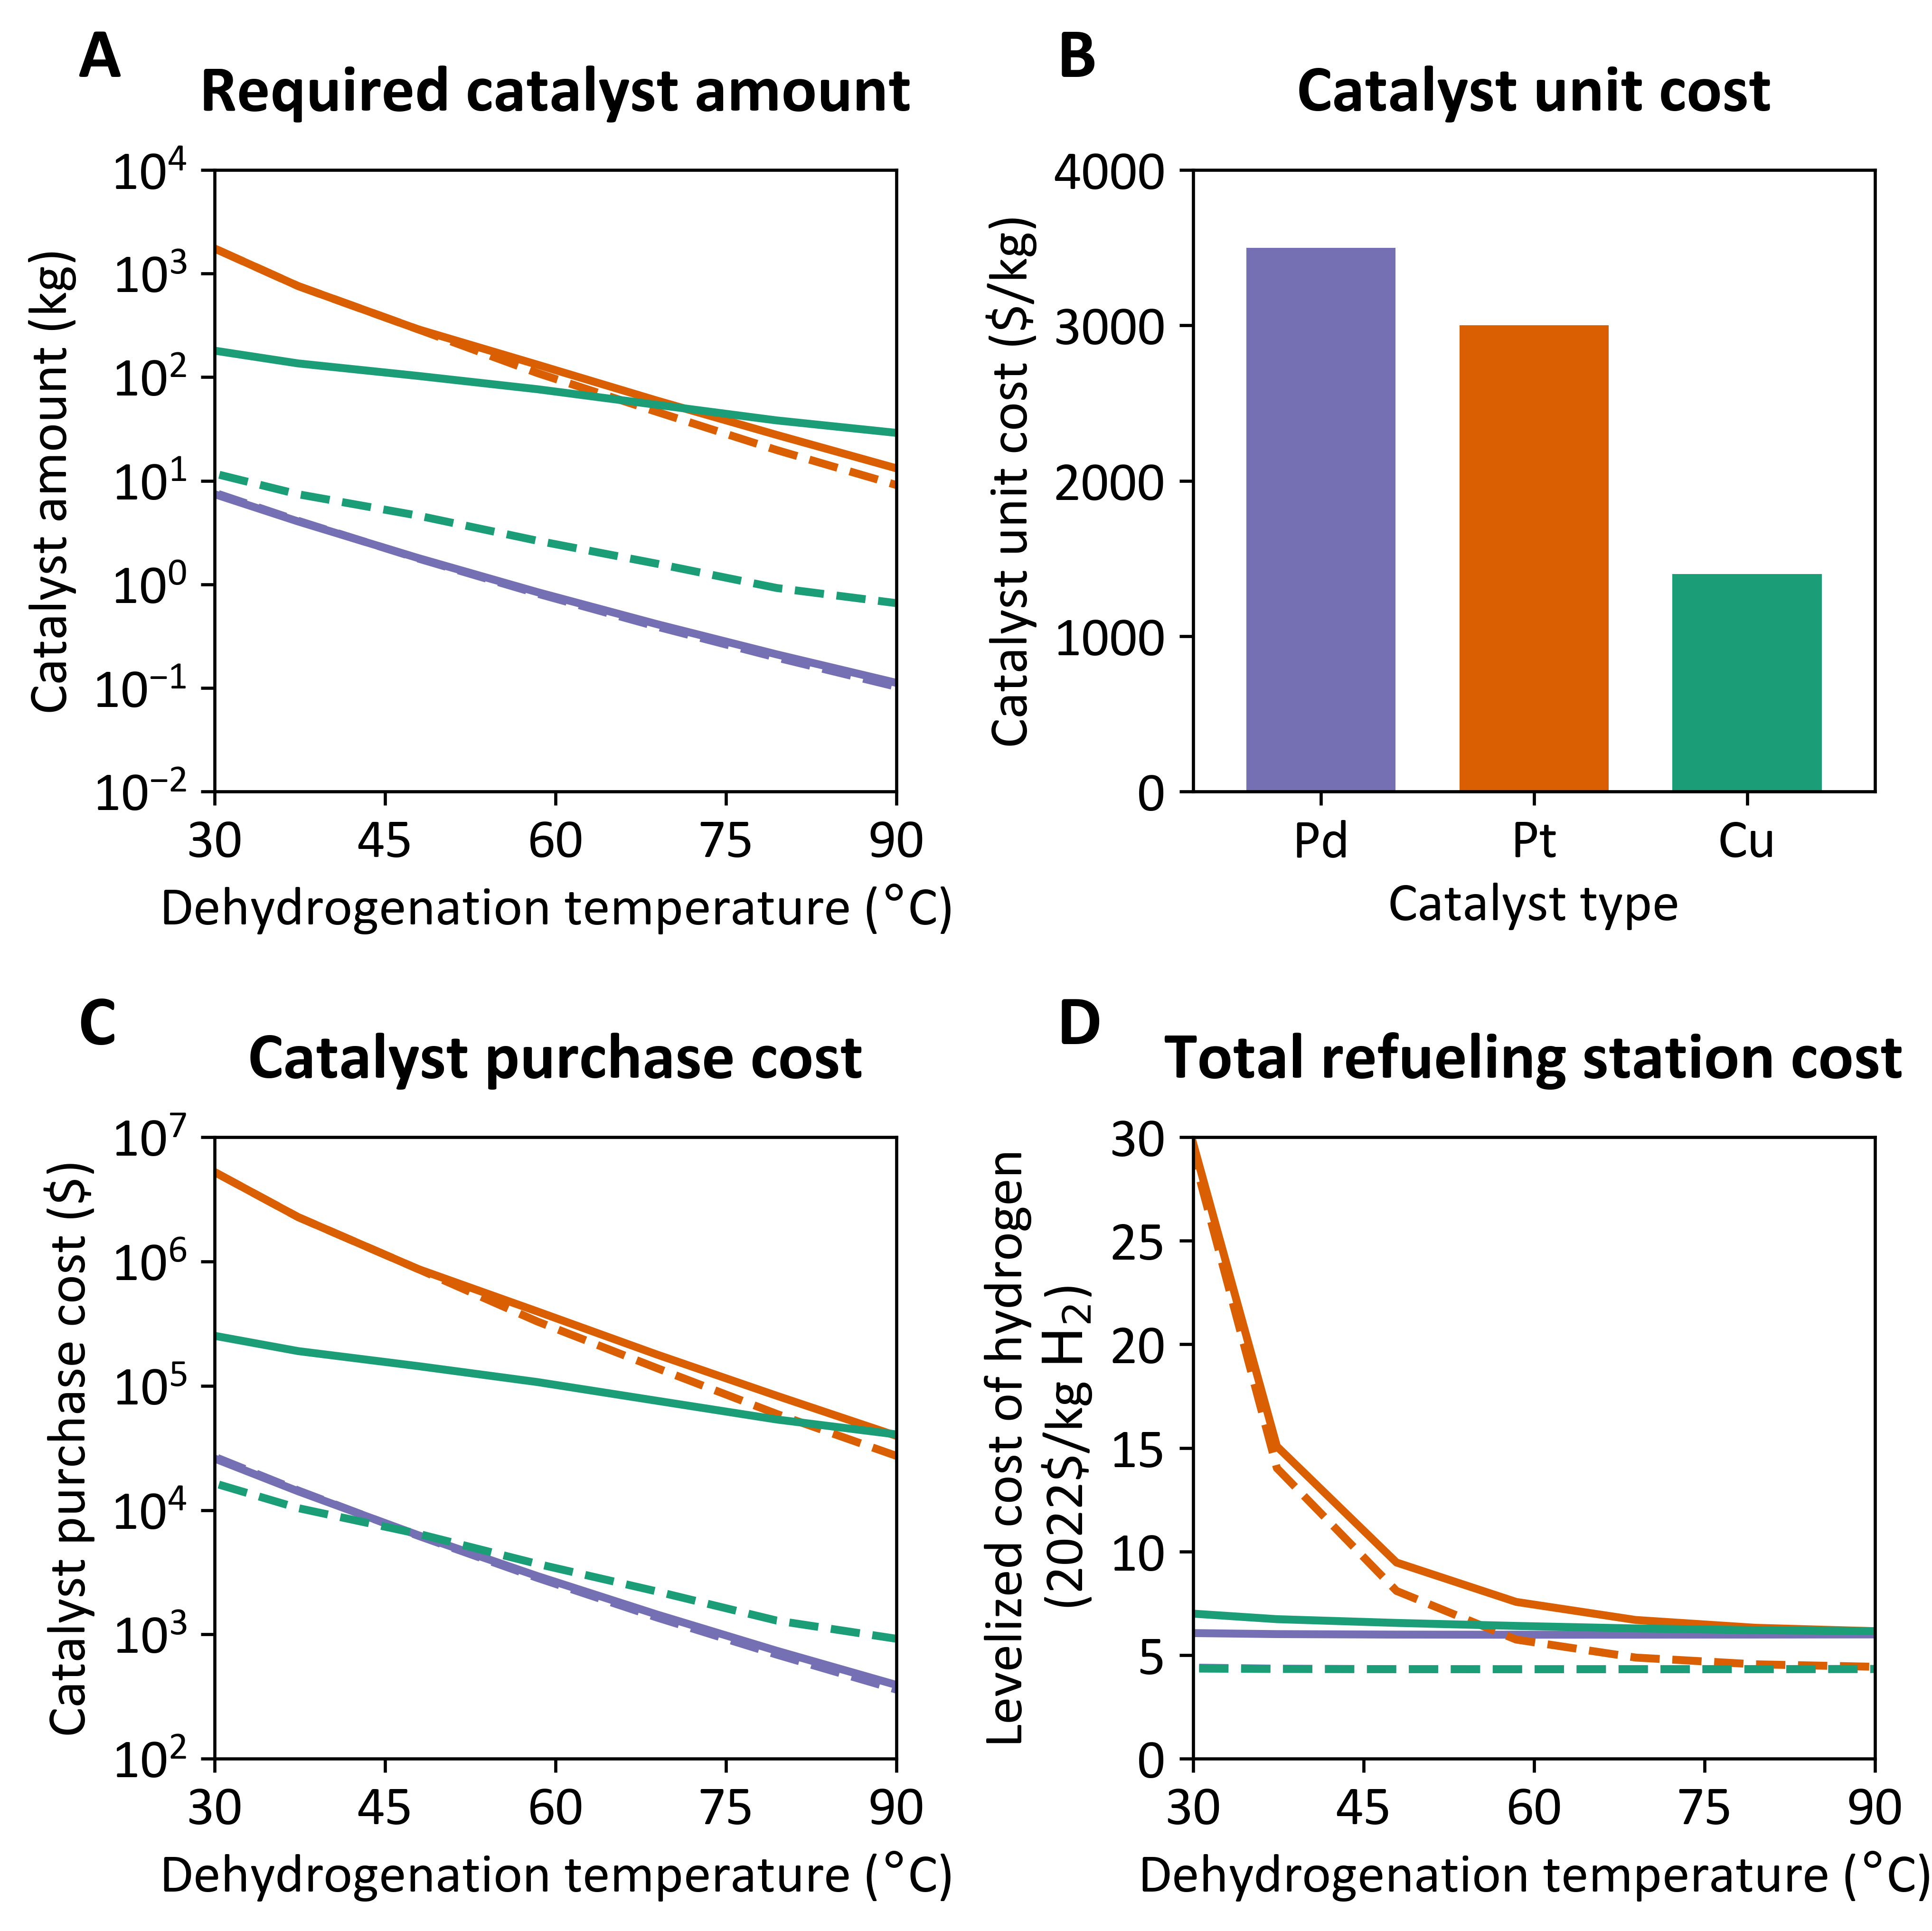

In [22]:
# plot catalyst amount, catalyst purchase cost, and total refueling station cost
# as function of temperature and pressure for multiple catalysts

# number of subplot rows and columns
nrows = 2
ncols = 2

# create subplots
fig, axes = plt.subplots(
    figsize=(7, 7),
    nrows=nrows,
    ncols=ncols, 
    layout='tight',
    dpi=600
    )

# fill subplots
for catal in colors_catal.keys():
    
    # color for each catalyst
    color = colors_catal[catal]

    for pres in linestyles_pres.keys():
        
        # column name to plot
        catal_pres = catal + ', ' + str(int(pres)) + ' bar'
        
        # line style for each pressure
        linestyle = linestyles_pres[pres]
    
        # plot catalyst amount (kg)
        df_catal_amt_kg_pivot[catal_pres].plot(
            ax=axes[0][0],
            linewidth=2.0,
            color=color,
            linestyle=linestyle,
            xticks=np.linspace(30, 90, 5),
            xlim=(30, 90),
            xlabel='Dehydrogenation temperature ($\\degree$C)',
            logy=True,
            ylabel='Catalyst amount (kg)',
            yticks=np.logspace(-2, 4, 7),
            ylim=(1e-2, 1e4),
        )

        # plot catalyst purchase cost ($)
        df_catal_cost_pivot[catal_pres].plot(
            ax=axes[1][0],
            linewidth=2.0,
            color=color,
            linestyle=linestyle,
            xticks=np.linspace(30, 90, 5),
            xlim=(30, 90),
            xlabel='Dehydrogenation temperature ($\\degree$C)',
            logy=True,
            ylabel='Catalyst purchase cost ($)',
            yticks=np.logspace(2, 7, 6),
            ylim=(1e2, 1e7),
            )
        
        # plot total refueling station cost ($/kg H2)
        df_stn_tot_pivot[catal_pres].plot(
            ax=axes[1][1],
            linewidth=2.0,
            color=color,
            linestyle=linestyle,
            xticks=np.linspace(30, 90, 5),
            xlim=(30, 90),
            xlabel='Dehydrogenation temperature ($\\degree$C)',
            ylabel='Levelized cost of hydrogen\n' + \
                '({:0.0f}\\$/kg'.format(output_dollar_year) + \
                ' ${H_2}$)',
            yticks=np.arange(0, 101, 5),
            ylim=(0, 30)
            )

# plot catalyst unit cost ($/kg)
df_catal_unit_cost.plot.bar(
    ax=axes[0][1],
    y='dehydr. catalyst cost ($/kg)',
    color=colors_catal.values(),
    xlabel='Catalyst type',
    ylabel='Catalyst unit cost ($/kg)',
    ylim=(0, 4000),
    width=0.7,
    rot=0,
    )
axes[0][1].get_legend().remove()

# update subplot titles
axes[0][0].set_title(
    'Required catalyst amount',
    fontweight='bold',
    pad=15
)

axes[0][1].set_title(
    'Catalyst unit cost',
    fontweight='bold',
    pad=15
)

axes[1][0].set_title(
    'Catalyst purchase cost',
    fontweight='bold',
    pad=15
)

axes[1][1].set_title(
    'Total refueling station cost',
    fontweight='bold',
    pad=15
)

# add subplot numbering
text=[['A', 'B'], ['C', 'D']]
for i in range(nrows):
    for j in range(ncols):
        axes[i][j].annotate(
            text[i][j], 
            xy=(-0.2, 1.15), 
            xycoords='axes fraction', 
            annotation_clip=False,
            fontsize=18,
            fontweight='bold'
        )

# save plot
plt.savefig(
    'catalyst amout + cost + station cost vs T and p.svg',
    bbox_inches='tight'
    )

# show plot
plt.show()